In [3]:

import gym
import numpy as np
import random 
import sys
import matplotlib.pyplot as plt

terminal_output = open(1, 'w') 

# env = gym.make("FrozenLake-v1")
env = gym.make("FrozenLake8x8-v1")
env.reset()                    
env.render()


SFFFFFFFF
FFFFFHFFF
FHFFFFFHF
FFHFFFFFF
FFFHFFFHF
FFHFFFFFH
FFFFFHFFF
FFFFFFFFF
FFFFFFHFG


In [3]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(81)


In [4]:
state_size = env.observation_space.n  # visas būsenų skaičius
action_size = env.action_space.n      # visas veiksmų skaičius

qtable = np.zeros((state_size, action_size))
qtable_history = []
score_history = []
# print(qtable)

In [5]:
# parameterai kuriais varijuojama
learning_rate = 0.8 # Apsimokymo dažnis arba learningRate
gamma = 0.9  # Nuolaidos dydis arba gamma
epsilon = 1.0 # Tyrinėjimo tikimybė
max_epsilon = 1.0    # Maksimali tyrinėjimo tikimybės reikšmė
min_epsilon = 0.001   # Minimali tyrinėjimo tikimybės reikšmė 
decay_rate= 0.00005    # Tyrinėjimo tikimybės mažinimo dydis

total_episodes = 250000 # Maksimalus iteracijų kiekis
max_steps = 400 # Maksimalus žingsnių per vieną iteraciją kiekis

In [6]:
rewards = []
steps_total = []
deadNr = 0
passNr = 0

for episode in range(total_episodes):
    # Aplinka nustatoma iš naujo
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    print("running episode: "+ str(episode), file=terminal_output)
    
    for step in range(max_steps):

        # generuojamas atsitiktinis skaičius
        exp_exp_tradeoff = random.uniform(0, 1)
        
        # jei generuotas kaičius > epsilon tada naudojamasi Q lentele
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # jei generuotas kaičius < arba = epsilon tada agentas tyrinėja atsitiktinai
        else:
            action = env.action_space.sample()
            #print("action random", action)
            
        
        # Daromas pasirinktas žingsnis ir stebimi rezultatai
        new_state, reward, done, info = env.step(action)

        # naudojantis Q funkcija naujimana lentelė
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        state = new_state
        
        # Jei tikslas pasiektas epizodas baigiamas
        if done == True: 
            break
        
    # epsilon skaičiaus mažinimas, nes jau turime kažkiek išmoktos informacijos
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    steps_total.append(step)
    if episode % 10000 == 0:
        print('Episode: {} Reward: {} Steps Taken: {}'.format(episode, reward, step))
    
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)


Episode: 0 Reward: 0.0 Steps Taken: 1
Episode: 10000 Reward: 0.0 Steps Taken: 0
Episode: 20000 Reward: 0.0 Steps Taken: 0
Episode: 30000 Reward: 0.0 Steps Taken: 5
Episode: 40000 Reward: 0.0 Steps Taken: 21
Episode: 50000 Reward: 0.0 Steps Taken: 15
Episode: 60000 Reward: 0.0 Steps Taken: 23
Episode: 70000 Reward: 0.0 Steps Taken: 41
Episode: 80000 Reward: 0.0 Steps Taken: 47
Episode: 90000 Reward: 1.0 Steps Taken: 104
Episode: 100000 Reward: 0.0 Steps Taken: 27
Episode: 110000 Reward: 0.0 Steps Taken: 8
Episode: 120000 Reward: 1.0 Steps Taken: 74
Episode: 130000 Reward: 1.0 Steps Taken: 103
Episode: 140000 Reward: 1.0 Steps Taken: 48
Episode: 150000 Reward: 1.0 Steps Taken: 69
Episode: 160000 Reward: 1.0 Steps Taken: 148
Episode: 170000 Reward: 1.0 Steps Taken: 57
Episode: 180000 Reward: 1.0 Steps Taken: 102
Episode: 190000 Reward: 1.0 Steps Taken: 64
Episode: 200000 Reward: 1.0 Steps Taken: 29
Episode: 210000 Reward: 1.0 Steps Taken: 91
Episode: 220000 Reward: 1.0 Steps Taken: 47
Epi

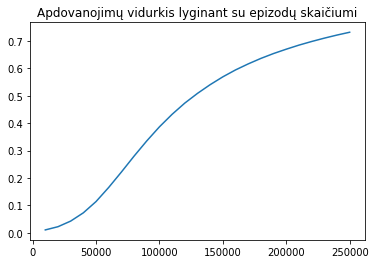

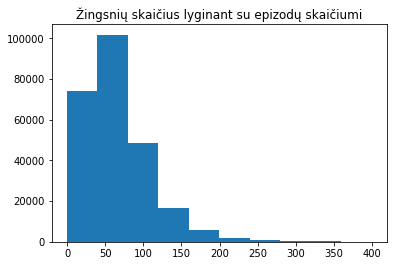

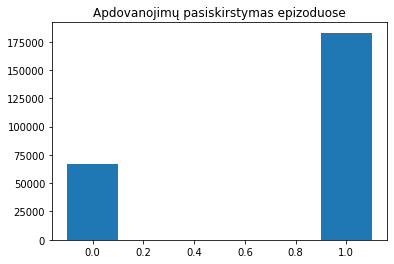

Dalis epizodų kurie pasiekė tikslą: 0.731712
Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): 0.93
Vidutinis žingsnių skaičius: 63.89
Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): 78.81


In [52]:
plt.plot(list(range(0, total_episodes+1, round((total_episodes+1)/len(score_history))))[1:], score_history)
plt.title("Apdovanojimų vidurkis lyginant su epizodų skaičiumi")
plt.show()

plt.hist(steps_total, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

plt.hist(rewards, align='mid', bins=[-0.10,0.10,0.90,1.10])
plt.title("Apdovanojimų pasiskirstymas epizoduose")
plt.show()

print("Dalis epizodų kurie pasiekė tikslą: {0}".format(sum(rewards)/total_episodes))
print("Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): {0}".format(sum(rewards[-100:])/100))

print("Vidutinis žingsnių skaičius: %.2f" % (sum(steps_total)/total_episodes))
print("Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): %.2f" % (sum(steps_total[-100:])/100))

In [54]:
env.reset()
amountsPassed = 0
amountToTest = 100
steps_total_test = []
for episode in range(amountToTest):
    state = env.reset()
    step = 0
    done = False
    # print("****************************************************")
    # print("EPISODE ", episode)
    # env.render()
    
    for step in range(max_steps):
        
        # pasirenkamas geriausias (nešantis didžiausią apdovanojimą) galimas veiksmas naudojantis Q lentele
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        # env.render()
        if done:
            if reward == 1.0: 
                amountsPassed += 1
            # env.render()
            
            print("Number of steps", step)
            steps_total_test.append(step)
            break
        state = new_state
print("Trained model passed: "+str(amountsPassed) + " out of " + str(amountToTest))
env.close()

Number of steps 46
Number of steps 112
Number of steps 73
Number of steps 82
Number of steps 141
Number of steps 51
Number of steps 107
Number of steps 57
Number of steps 65
Number of steps 45
Number of steps 65
Number of steps 39
Number of steps 96
Number of steps 167
Number of steps 32
Number of steps 40
Number of steps 75
Number of steps 65
Number of steps 139
Number of steps 97
Number of steps 66
Number of steps 76
Number of steps 110
Number of steps 51
Number of steps 93
Number of steps 14
Number of steps 45
Number of steps 97
Number of steps 50
Number of steps 83
Number of steps 70
Number of steps 43
Number of steps 120
Number of steps 114
Number of steps 33
Number of steps 94
Number of steps 89
Number of steps 43
Number of steps 86
Number of steps 71
Number of steps 57
Number of steps 190
Number of steps 103
Number of steps 23
Number of steps 64
Number of steps 80
Number of steps 76
Number of steps 54
Number of steps 104
Number of steps 56
Number of steps 115
Number of steps 88


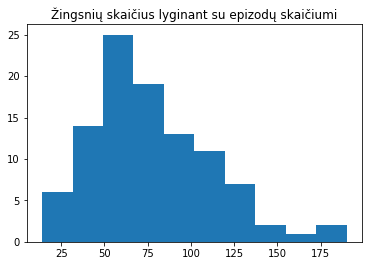

Vidutinis žingsnių skaičius per testą: 77.21


In [57]:
plt.hist(steps_total_test, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

print("Vidutinis žingsnių skaičius per testą: %.2f" % (sum(steps_total_test)/amountToTest))